WEEK-3 ASSIGNMENT KNN SCRIPT

K-Nearest Neigbour- is a lazy supervised learning algorithm since it takes more time to train data until the data are used for classification (Asha, et al., 2012). It is a method to classify the data using the training examples available in the feature space. It is used for classification and prediction. The classification phase divides the data in to testing data and training data. The K nearest (Distance Calculation) training set data are found for each row of testing data and the classification is done by determining the majority vote by breaking the ties at random. Each neighbor is assigned a weight such that nearer neighbors contributes more to the average than the distant neighbors. The neighbors are taken from an object dataset with reference to a known class. So no explicit time is required for training. If tie occurs for Kth nearest vector, all the candidates are included for voting. It is better to choose odd values for k in case of binary classification to avoid ties.
The algorithm for KNN is as follows:
1. Let D be the training samples and k be the number of nearest neighbors
2. For each sample class create a super class (Average of every training set)
3. Compute Euclidean distance for every training sample
4. Classify the sample based on majority of class among the neighbors
5. End

IMPORTING LIBRARIES AND REQUIRED PACKAGES

In [115]:
# Import pandas
import numpy as np #linear algebra
from scipy.stats import mode
import scipy as sc
import pandas as pd # For data processing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns #Data Visualization
import sklearn
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC

LOADING DATASET : PIMA INDIAN DIABETES

In [58]:
#Read in the file
Diabetes= pd.read_csv("/Users/dhanashri/Documents/diabetes2.csv")
#Display the data 
Diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [59]:
#Columns in the dataset
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
#Checking the dimensions of the dataset
Diabetes.shape

(768, 9)

In [61]:
#Print Info
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


DATA CLEANING AND EXPLORATORY DATA ANALYSIS

In [62]:
#Making the values NaN
Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
Diabetes.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Filling the Null Value By Imputing Using k-NN


In [7]:
pip install impyute

Note: you may need to restart the kernel to use updated packages.


In [63]:
#Filling the null values by Imputing using KNN
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
# start the KNN training
imputed_training=fast_knn(Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].values, k=30)
Diabetes_Knn = pd.DataFrame(imputed_training,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])
Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Diabetes_Knn[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

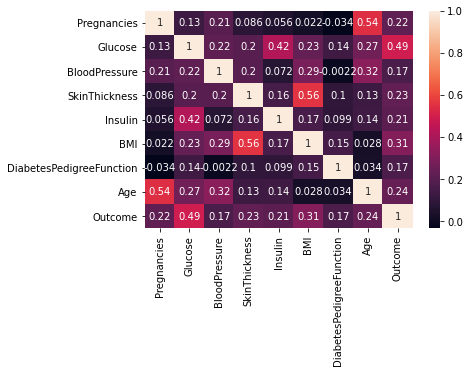

In [64]:
#Heatmap
sns.heatmap(Diabetes.corr(),annot=True)

Text(0.5, 1.0, 'Diabetes Patient')

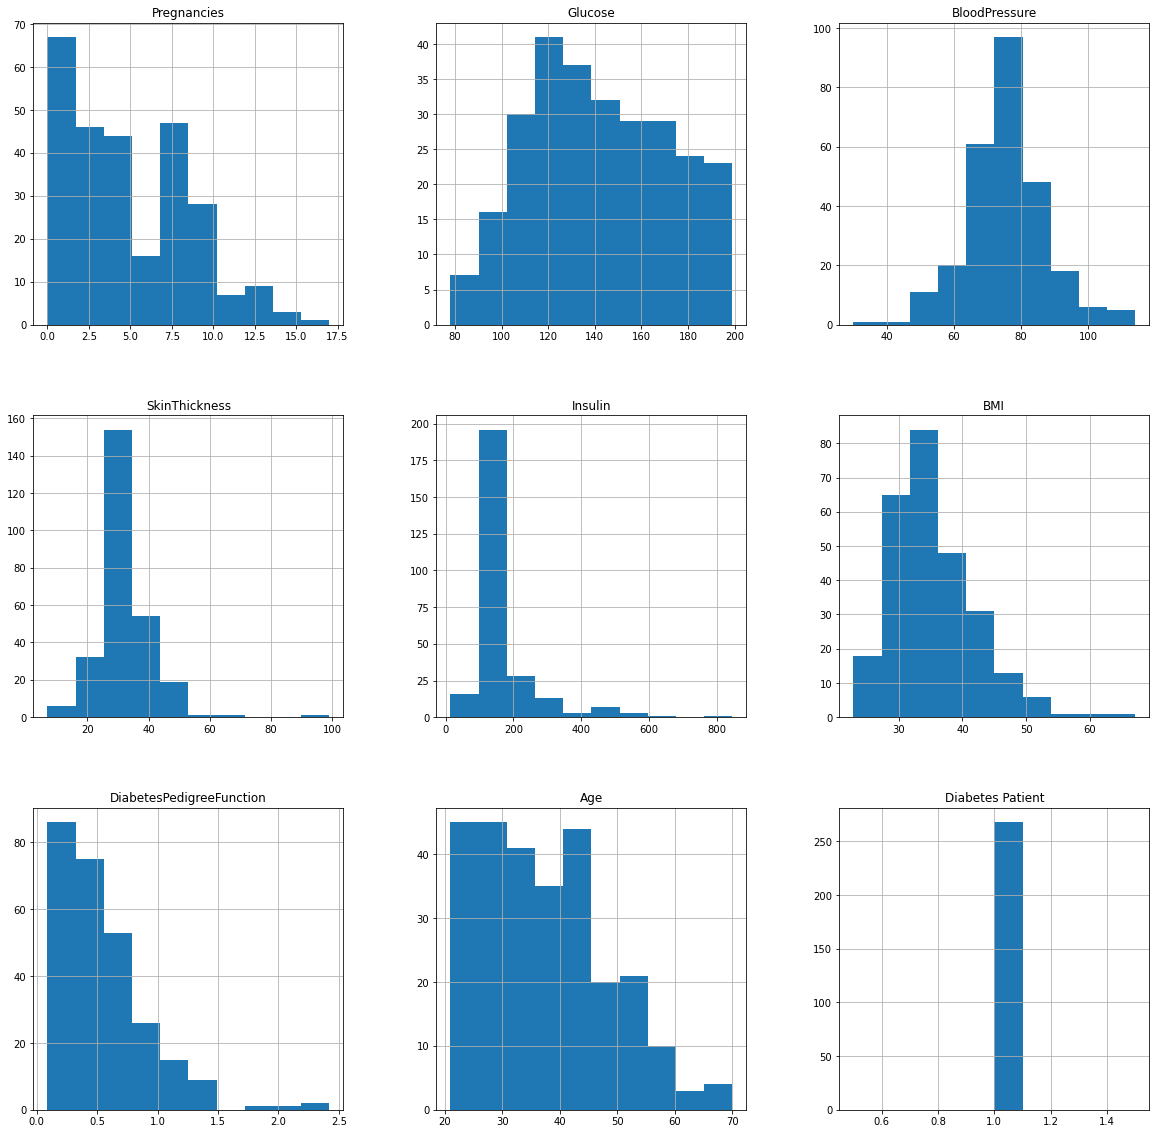

In [65]:
p = Diabetes[Diabetes['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

KNN feature Visualization

In [11]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [66]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

In [86]:
X = Diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = Diabetes['Outcome']
    

<AxesSubplot:>

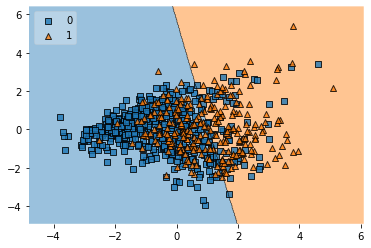

In [87]:
clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X)
clf.fit(X_train2, Diabetes['Outcome'].astype(int).values)
plot_decision_regions(X_train2, Diabetes['Outcome'].astype(int).values, clf=clf, legend=2)

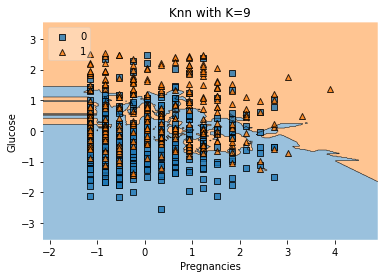

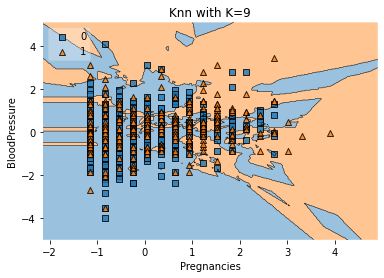

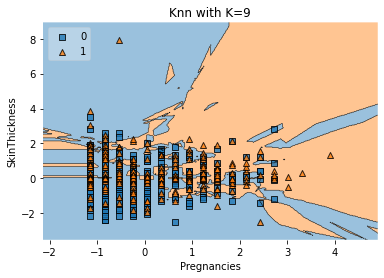

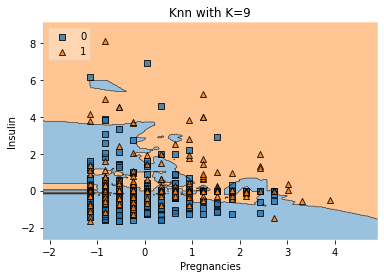

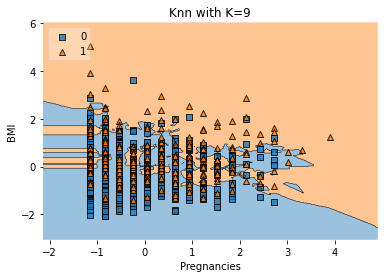

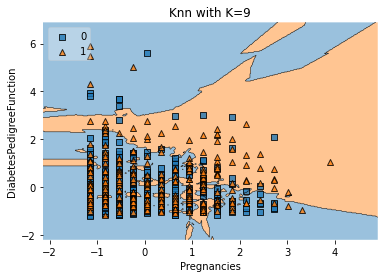

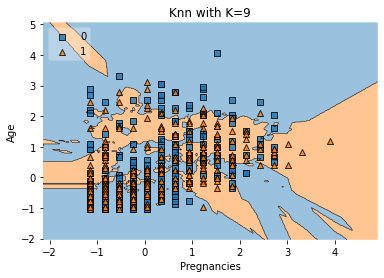

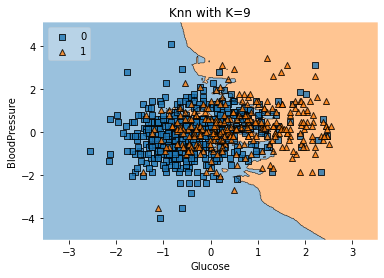

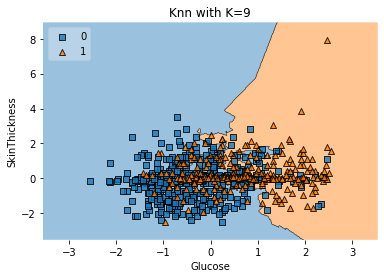

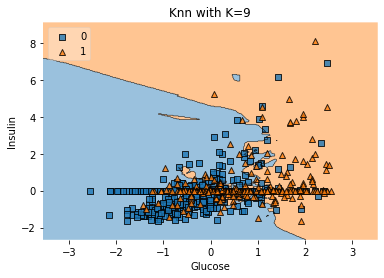

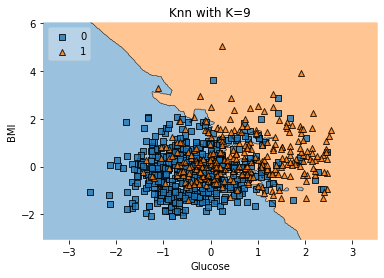

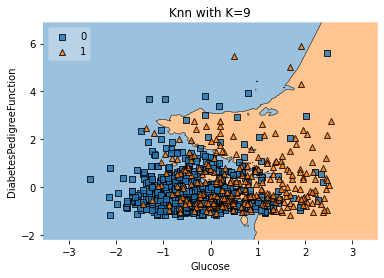

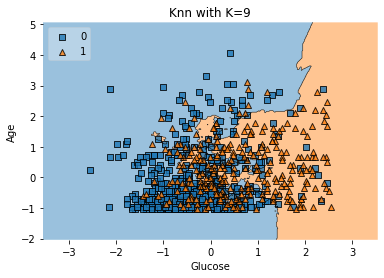

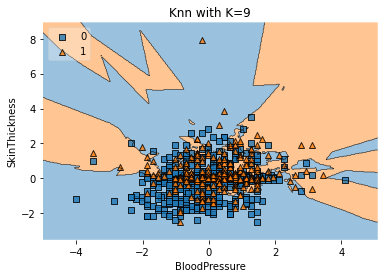

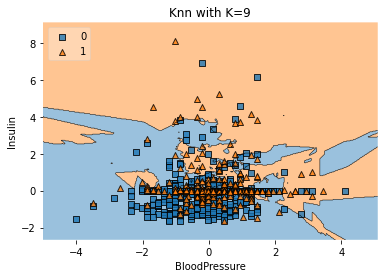

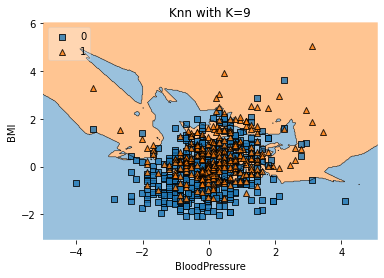

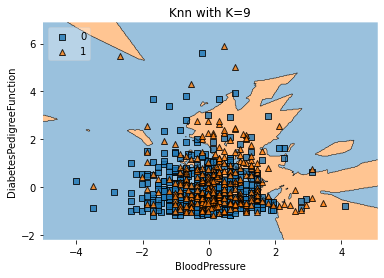

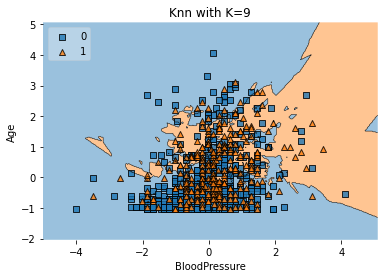

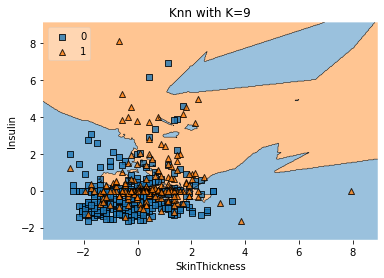

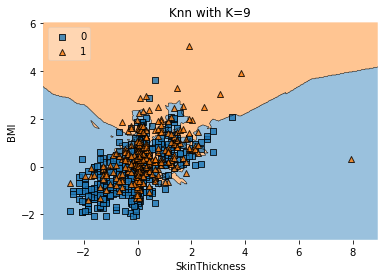

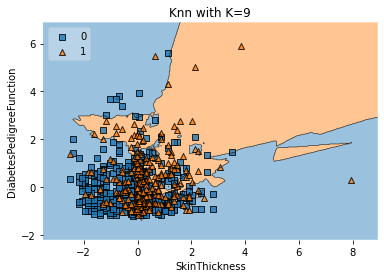

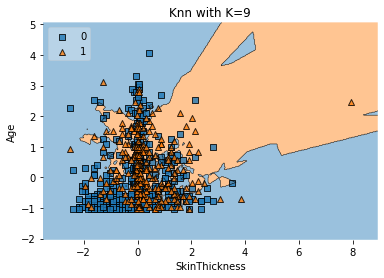

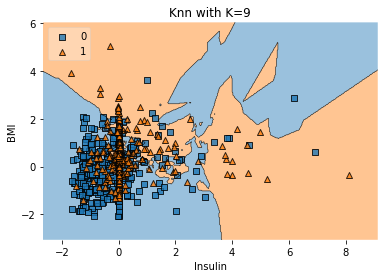

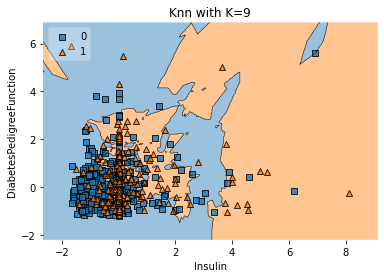

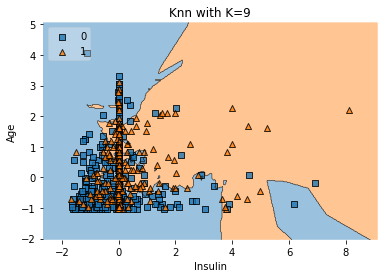

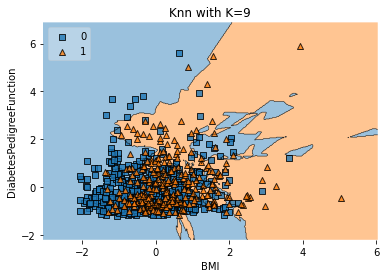

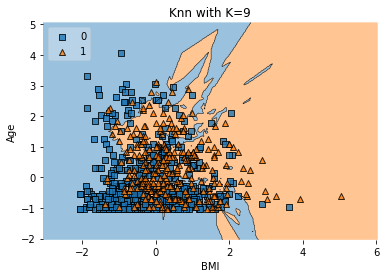

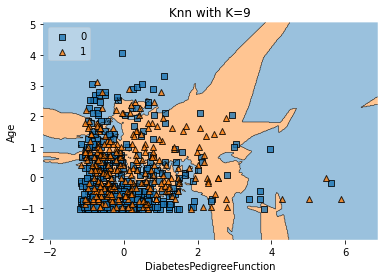

In [88]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
def ok(X,Y):
  x = Diabetes[[X,Y]].values
  y = Diabetes['Outcome'].astype(int).values
  clf = neighbors.KNeighborsClassifier(n_neighbors=9)
  clf.fit(x, y)
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title('Knn with K='+ str(9))
  plt.show()
tt = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
ll = len(tt)
for i in range(0,ll):
  for j in range(i+1,ll):
    ok(tt[i],tt[j])

DATA PREPROCESSING

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Diabetes.drop('Outcome', axis = 1))
scaler_features = scaler.transform(Diabetes.drop('Outcome', axis = 1))
df_feat = pd.DataFrame(scaler_features, columns = Diabetes.columns[:-1])
# appending the outcome feature
df_feat['Outcome'] = Diabetes['Outcome'].astype(int)
Diabetes = df_feat.copy()
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865905,-0.035362,0.664068,-0.000278,0.168829,0.468492,1.425995,1
1,-0.844885,-1.204923,-0.531459,-0.017854,0.000021,-0.849667,-0.365061,-0.190672,0
2,1.233880,2.016365,-0.696824,-0.048445,0.004160,-1.329816,0.604397,-0.105584,1
3,-0.844885,-1.073442,-0.531459,-0.699775,-0.724364,-0.631418,-0.920763,-1.041549,0
4,-1.141852,0.504332,-2.681211,0.664068,0.146571,1.551075,5.484909,-0.020496,1


PERFORMING KNN

In [90]:
X = Diabetes.drop('Outcome', axis = 1)
y = Diabetes['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3, random_state=0)


In [97]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

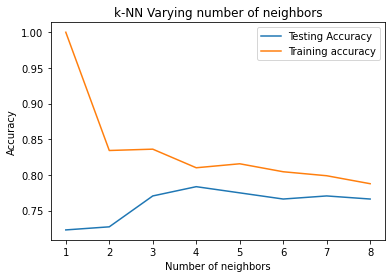

In [108]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
#We can observe above that we get maximum testing accuracy for k=4. So lets create a KNeighborsClassifier with number of neighbors as 4.

In [99]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)

In [100]:
knn.fit(X_train,y_train) # fit the model

KNeighborsClassifier(n_neighbors=4)

In [101]:
knn.score(X_test,y_test)  #get accuracy

0.7835497835497836

Classification Report

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       157
           1       0.76      0.47      0.58        74

    accuracy                           0.78       231
   macro avg       0.78      0.70      0.72       231
weighted avg       0.78      0.78      0.77       231



CONFUSION MATRIX

[[146  11]
 [ 39  35]]


<AxesSubplot:>

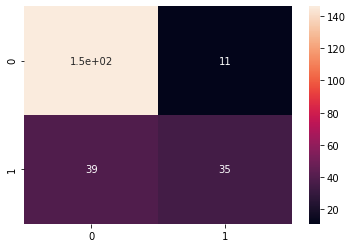

In [105]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [106]:
#Confusion matrix can also be obtained using crosstab method of pandas.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,146,11,157
1,39,35,74
All,185,46,231


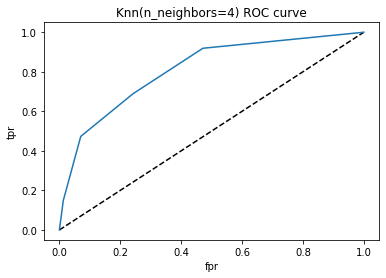

In [109]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=4) ROC curve')
plt.show()


In [110]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.810294370803925

Week-04 Script for SVM


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

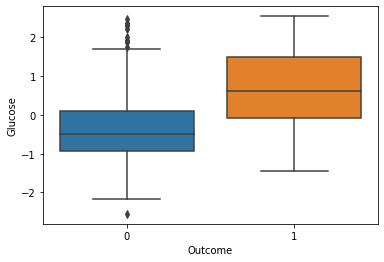

In [112]:
sns.boxplot(x='Outcome', y='Glucose', data=Diabetes)

In [116]:
X = Diabetes.drop(['Outcome'], axis=1)
y = Diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model = svm.SVC(C=2, gamma='scale', kernel='linear')
model.fit(X_train, y_train)
prediction = model.predict(X_test)


In [117]:
print(metrics.accuracy_score(prediction, y_test) * 100)

78.57142857142857


[[91 12]
 [21 30]]


<AxesSubplot:>

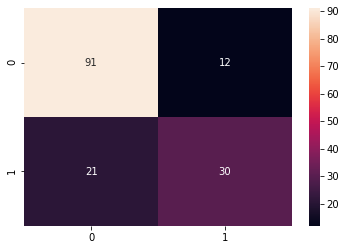

In [119]:
print(confusion_matrix(y_test, prediction))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [120]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       103
           1       0.71      0.59      0.65        51

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [121]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.21428571428571427
MSE: 0.21428571428571427
RMSE: 0.4629100498862757


ACCURACY FOR DECISION TREE

In [124]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))


Accuracy Score: 0.6883116883116883


ACCURACY FOR RANDOM FOREST CLASSIFIER

In [125]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.7467532467532467
